# Perform 4
In this assignment, you will demonstrate your mastery of aggregating and summarizing data with Pandas `groupby` and `pivot_table` and merging/joining datasets using Pandas `concat` and `merge`.

You can either print answers directly from your code or write them in the markdown cells below your code. Either way, make sure that your answers are visible and can be easily read in the final notebook you turn in.

## Part 1: COVID-19 Dataset
In this part we work with the `covid_19_data.csv` dataset. It contains records of the cumulative numbers of confirmed cases of the disease (the `Confirmed` column), deaths from the disease (the `Deaths` column), and recovered individuals (the `Recovered` column). Remember that cumulative means total up to this date, i.e., a given observation is the previous observation plus any additional since then.

Each such value corresponds to a particular `Province/State` within a given `Country/Region`. Some rows do not include information at the `Province/State` level, in which case the data correspond to the `Country/Region` as a whole. The date of the record is given in the `ObservationDate` column. Below we import the dataset and preview the first few rows. 

In [1]:
# Run but do not modify this code
import pandas as pd
covid = pd.read_csv("covid-19.csv", parse_dates=["ObservationDate"])
covid.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [2]:
type(covid["ObservationDate"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Question 1 (9 points, 3 each)

1. Which `Country/Region` has reported the most total observations (rows), and how many did they report? 
2. How many `Country/Region`s have reported at least 100 `Deaths` due to COVID-19?
3. Which five `Province/State`s of the `Country/Region` of `Mainland China` have reported the most `Deaths` to date, and how many `Deaths` have they reported?

In [3]:
# 1
topcountry=covid.groupby("Country/Region").count().sort_values(by=['ObservationDate'],ascending=False)
print(topcountry.iloc[0])
#2
deathspercountry=covid.groupby('Country/Region')['Deaths'].sum()
print(len(deathspercountry[deathspercountry >= 100].index.tolist()))
#3
deathsperstate=covid[covid['Country/Region']=='Mainland China']
print(deathsperstate.groupby('Province/State')['Deaths'].sum().sort_values(ascending=False).iloc[0:5])

ObservationDate    19461
Province/State     19339
Confirmed          19461
Deaths             19461
Recovered          19461
Name: Russia, dtype: int64
178
Province/State
Hubei           1446052.0
Henan              7500.0
Heilongjiang       4484.0
Beijing            2967.0
Guangdong          2681.0
Name: Deaths, dtype: float64


### Answer 1
1. Russia has reported the most with 19461.
2. 178
3. Hubei             1446052.0
Henan                7500.0
Heilongjiang         4484.0
Beijing              2967.0
Guangdong            2681.0

### Question 2 (6 points, 3 each)

1. Report the first five `Province/State`s within the `Country/Region` of `US` to record a `Confirmed` case along with the dates on which they recorded their first case(s).

2. All of the data for the `Country/Region` of `US` is recorded at the `Province/State` level. Create a Pandas Series called `total_cases_us` where the primary index has `ObservationDate`s and the values are the total `Confirmed` cases added up accross all of the `Province/State`s in the `Country/Region` of `US`. For example, the first several rows of the Series should look like:
```
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
```
When you are finished, print `total_cases_us.head()` and then run the following code cell to visualize the spread of the virus in the United States as a line plot.  

In [4]:
# 1
USstate=covid[covid['Country/Region']=='US']
confirmed=USstate[USstate['Confirmed']==1]
print(confirmed.groupby('ObservationDate')['Province/State'].min().iloc[0:5])
# 2
total_cases_us=USstate.groupby('ObservationDate')['Confirmed'].sum()
total_cases_us.head()

ObservationDate
2020-01-22    Washington
2020-01-23    Washington
2020-01-24       Chicago
2020-01-25      Illinois
2020-01-26       Arizona
Name: Province/State, dtype: object


ObservationDate
2020-01-22    1.0
2020-01-23    1.0
2020-01-24    2.0
2020-01-25    2.0
2020-01-26    5.0
Name: Confirmed, dtype: float64

### Answer 2
1. 2020-01-22               Washington
2020-01-23               Washington
2020-01-24                  Chicago
2020-01-25                 Illinois
2020-01-26                  Arizona

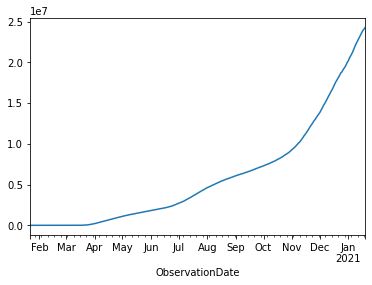

In [5]:
# Run but do not modify this code
# You should compute `total_cases_us` above for Q2.2
total_cases_us.plot()

## Part 2: Movie Ratings
In this part we return to the movie review dataset that contains information about various users who have rated several different movies. To start, use `first_hundred.csv` contains all data for the first 100 `user_id`s (`1` through `100`) with all information merged into one table. Later, we will consider combining information from additional files with data on the subsequent `user_id`s. Below we import `first_hundred.csv` into the DataFrame `df_fh` and preview the first few rows.

In [6]:
# Run but do not modify this code
import pandas as pd
df_fh = pd.read_csv("first_hundred.csv")
df_fh.head()

,user_id,age,sex,occupation,movie_id,rating,movie_title
0,1,24,M,technician,61,4,Three Colors: White (1994)
1,13,47,M,educator,61,4,Three Colors: White (1994)
2,18,35,F,other,61,4,Three Colors: White (1994)
3,58,27,M,programmer,61,5,Three Colors: White (1994)
4,59,49,M,educator,61,4,Three Colors: White (1994)


### Question 3 (6 points, 3 each)
Use Pandas `pivot_table`s to answer the following about the data in `first_hundred.csv`. Note: What you choose to be the rows or columns of the `pivot_table`s is up to you as long as you are showing the correct groupings and values. We do recommend doing each part in it's own cell, for nicer table formatting.

1. For each of the five possible `rating` values (1 through 5) report how many ratings of that value were recorded for `sex=='M'` and for `sex=='F'`. That is, how many total ratings of `1` were given by women, how many total ratings of `2` were given by women, etc., and the same for men. Display your resulting pivot table.

2. Compute the `decade` of a user to be their `age // 10` (where `//` stands for integer division in Python so that someone with `age` between 0 and 9 would have `decade` 0, between 10 and 19 would have `decade` 1, and so on). Create a pivot table that shows the total number of `rating`s in the dataset for each combination of `decade` and `sex`. That is, your pivot table should show how many total `rating`s were made by users who are `decade==0` and `sex=='F'`, `decade==1` and `sex=='F'`, etc., and the same for `sex=='M'` for each of the five possible `rating` values (1 through 5). Use the `fill_value=0` optional parameter to the Pandas `pivot_table` method so that combinations for which there are no ratings will be printed as 0.  Display your resulting pivot table.

In [7]:
# 1
df_fh.pivot_table(index='rating', columns='sex',
                    aggfunc={'rating':'count'})
# Feel free to add additional cells

rating      
sex         F     M
rating             
1         200   511
2         263   870
3         663  2053
4         835  2994
5         640  1990

In [8]:
#2
df_fh['decade']=df_fh['age']//10
df_fh.pivot_table(index='decade', columns=['rating','sex'],fill_value=0,
                    aggfunc={'rating':'count'})

rating                                             
rating      1         2         3         4         5     
sex         F    M    F    M    F    M    F    M    F    M
decade                                                    
0           0    1    0    4    0    9    0   19    0   10
1           1   15    4   13    9   57   31   50   31   35
2          94  187  148  309  228  631  317  924  270  664
3          53   86   68  218  292  530  276  663  199  294
4          46  176   40  230  101  470  145  648  106  501
5           6   44    3   80   33  314   66  597   34  339
6           0    2    0   16    0   42    0   93    0  147

### Question 4 (9 points, 3 each)
`first_hundred.csv` only contains ratings from the first 100 `user_id`s containing about 11% of the total ratings. The remaining ratings are split across two additional files: `other_ratings_a.csv` and `other_ratings_b.csv`. In addition, information about additional users not in the first hundred is contained in the `other_users.csv` file, and information about all movies is contained in the `movies.csv` file. You will need to import and appropriately combine data from all of these datasets in order to answer the following questions. We encourage you to start by exploring the individual datasets.

1. What percentage of the ratings were made by women (i.e., `sex=='F'`)?
2. What are the `movie_title`s of the five movies that have received the most ratings?
3. Several movies have not received very many `rating`s; average ratings of such movies are not very informative. Instead, what are the `movie_title`s and average `rating`s of the movies that have received *at least 10* `rating`s? Show the five movies with the highest average `rating`. 

In [9]:
import pandas as pd
firstusers = pd.read_csv("first_hundred.csv")
other_ratings_a = pd.read_csv("other_ratings_a.csv")
other_ratings_b = pd.read_csv("other_ratings_b.csv")
movies = pd.read_csv("movies.csv")


In [51]:
#Creating dataset with all relevant data :)
firstratings=firstusers[['user_id','movie_id','rating']]

allratings=other_ratings_a.append([other_ratings_b,firstratings])
personaldetails=firstusers[['user_id','age','sex','occupation']]
personaldetails=personaldetails.drop_duplicates(subset=['user_id'])
allpeopleandratings=pd.merge(personaldetails,allratings, on='user_id',how='outer')
masterdataset=pd.merge(movies,allpeopleandratings,on="movie_id",how='outer')


In [77]:
#1
print(allpeopleandratings[allpeopleandratings['sex']=='F'].count()/len(allpeopleandratings))
print(" ")
#2
mostrated=masterdataset.groupby('movie_title')['rating'].count().sort_values(ascending=False).iloc[0:5]
print(mostrated)
print(" ")
#3

numratings=masterdataset.groupby('movie_title')['rating'].count()
morethan10=numratings[numratings>=10]
morethan10df=pd.merge(morethan10,masterdataset, on="movie_title")
top5=morethan10df.groupby('movie_title')['rating_y'].mean().sort_values(ascending=False).iloc[0:5]
print(top5)





user_id       0.02601
age           0.02601
sex           0.02601
occupation    0.02601
movie_id      0.02601
rating        0.02601
dtype: float64
 
movie_title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64
 
movie_title
Close Shave, A (1995)                                     4.491071
Schindler's List (1993)                                   4.466443
Wrong Trousers, The (1993)                                4.466102
Casablanca (1942)                                         4.456790
Wallace & Gromit: The Best of Aardman Animation (1996)    4.447761
Name: rating_y, dtype: float64


### Answer 4
1. 2.601% based on user ids with reported gender